# Community detection

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m07-communities/lab07.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m07-communities/lab07.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

## Intuition

First, let's think about the extreme case. If a network consists of multiple groups that are barely connected, then we can expect that the network can be easily divided into these groups. Let's consider a "barbell" network, which consists of two complete graphs connected by a single edge. 

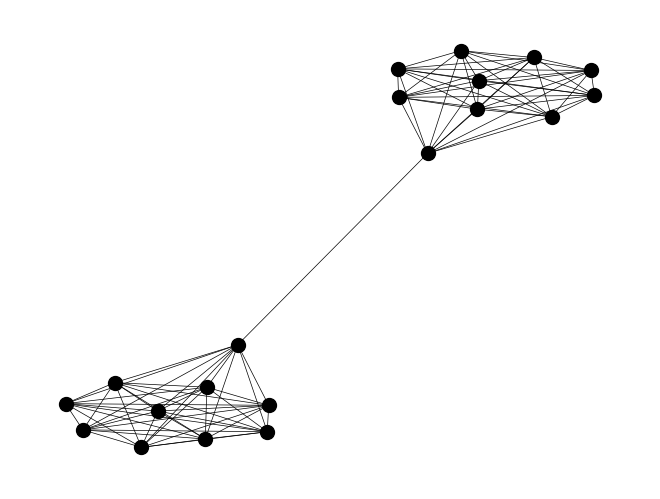

In [18]:
import networkx as nx

options = {
    'node_size': 100,
    'width': 0.5,
    'with_labels': False,
}

G = nx.barbell_graph(10, 0)
nx.draw(G, node_color="black", **options)

An obvious way to identify the two groups is to "cut" the edge that connects the two complete graphs. This is the intuition behind the "Girvan-Newman" algorithm, which is one of the earliest and most intuitive community detection algorithms.

This algorithm calculates the "betweenness" of each edge. Then, it removes the edge with the highest betweenness, and recalculates the betweenness of the edges. This process is repeated to break the network into smaller pieces. While doing so, we can measure the modularity of the network, which tells us when to stop the process.

In this extreme case, there is a clear "cut" that separates the two groups. And that's exactly what the Girvan-Newman algorithm finds. 

**Q: can you apply the Girvan-Newman algorithm to the barbell network?**

In [30]:
# YOUR SOLUTION HERE

communities

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

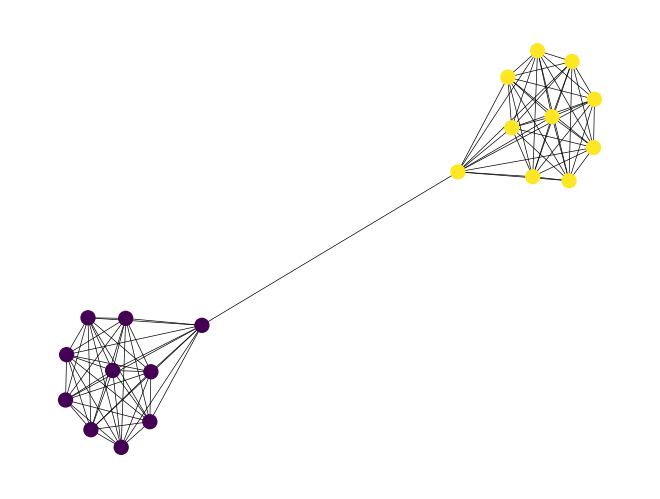

In [31]:
node_color = [0] * len(G)
for i, comm in enumerate(communities):
    for node in comm:
        node_color[node] = i

nx.draw(G, node_color=node_color, **options)

However, in reality, the network is not as clear-cut as the barbell network and the Girvan-Newman algorithm does not usually work well. It tends to destroy the network structure _before_ finding the communities. Moreover, the algorithm is computationally expensive, as it requires calculating the betweenness of all edges (one of the slowest operations in network analysis). 

So we don't really use it anymore in practice. 😅

## Divisive vs. Agglomerative 

The Girvan-Newman algorithm is an example of a "divisive" community detection algorithm. It starts with the entire network and breaks it into smaller pieces until we find the communities. Another way to think about community detection is to start with individual nodes and "merge" them into communities. This is called "agglomerative" community detection. (statistical inference is a more principled approach and we will talk about it later.)

In divisive algorithms, we focus on the boundary between communities. In agglomerative algorithms, we focus on the similarity or 'cohesion' within communities.

## Planted Partition Model

Let's think about the "barbell" network again. Instead of saying that there should be only one edge that connects the two complete graphs, we can allow more edges to connect the two communities. We can also make each community not a complete graph, but just a dense subgraph. Both of these changes make the network less clear-cut. 

This is a special case of "stoachastic block model" (SBM), and commonly referred to as the "planted partition model" because we "plant" the "partition" (community structure) into the network. In this model, we set the probability of an edge between nodes in the same community ($p_{in}$) to be higher than the probability of an edge between nodes in different communities ($p_{out}$).

**Q: make a planted partition model with 2 communities with the following parameters.**

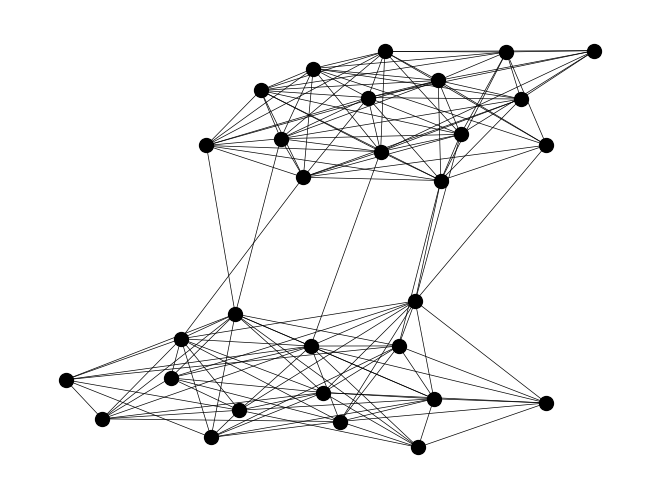

In [32]:
# make a planted partition graph with 2 communities, each with 15 nodes. 
# use p_in = 0.7 and p_out = 0.05

# YOUR SOLUTION HERE

nx.draw(G_planted, node_color="black", **options)

## Louvain algorithm

Given a network, you can come up with many ways to cluster the nodes. For instance, you can define similarity between nodes by calculating neighbor overlap. Once you have the similarity matrix, you can use a clustering algorithm to find the communities. However, when similarity measure is not tied to what we want to find (communities), they tend not to work well in practice. 

The most successful (heuristic) algorithms tend to see this problem as an optimization problem (maximizing modularity or similar objective functions like map equation) and use heuristics to find the communities. 

As you learn from the course modules, the two best examples, also the most widely used community detection algorithms, are the Louvain algorithm and the Infomap algorithm. Here, let's play with the Louvain algorithm: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities

**Q: apply the Louvain algorithm to the planted partition model and visualize the communities.**

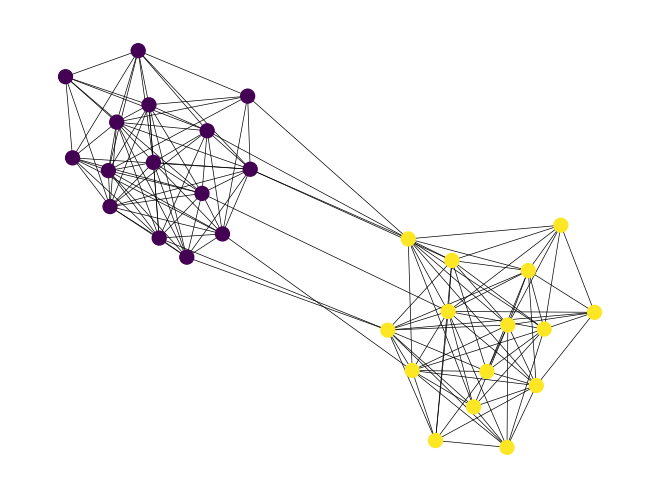

In [34]:
# YOUR SOLUTION HERE

# Zachary's Karate Club

Now, let's look at a real-world network. Zachary's Karate Club is the most famous social network data in community detection literature. Since Girvan and Newman used this network to illustrate their algorithm, it has been widely used to showcase community detection algorithms. The network is very small and easy to grasp, although it is not necessarily representative of real-world networks with community structure, it has been used as a go-to example for community detection algorithms. Actually, it is so over-used that it became the subject of an in-joke in the network science community. 

![](https://64.media.tumblr.com/d8b21a98efb7bdcdc2afdff163009474/tumblr_mmg1bek2lP1sqr43do2_r1_400.png)

There is a "club" called "The Zachary’s Karate Club CLUB" and an accompanying, traveling trophy: https://networkkarate.tumblr.com/ (you can also find me here...)

The trophy holder should bring the trophy to the conferences and workshops, and then pass it to the person who shows the Zachary's Karate Club network in their presentation for the first time in the conference. 😂 

For the honor of the club, let's try the Louvain algorithm on the Zachary's Karate Club network.

**Q: apply the Louvain algorithm to the Zachary's Karate Club network and visualize the communities.**

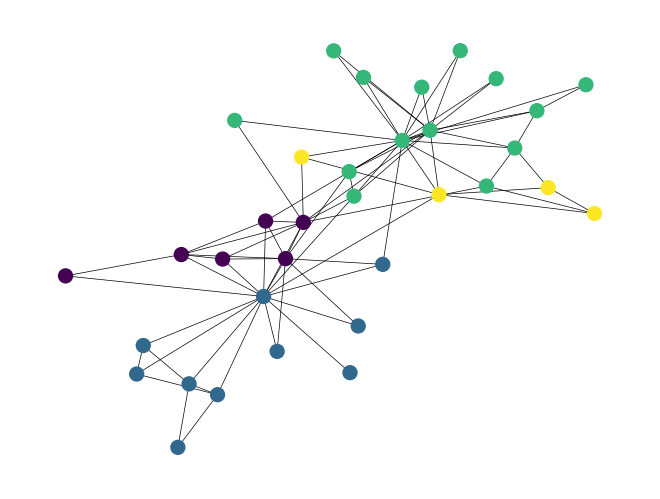

In [36]:
G_karate = nx.karate_club_graph()

# YOUR SOLUTION HERE


Not exactly the community structure we expected! 🙈 

Finding the exact two communities from this network does not mean that the algorithm is good; not finding the two communities also does not mean that the algorithm is bad! What is important is that we need to be very clear about what we want to find and how we evaluate the algorithm.



## Find some communities!

Now, pick a real-world network and find communities from the network! Pick a network where you expect to see fairly clear community structure (and small). Apply any community detection algorithm you like (Louvain, Infomap, etc.) and visualize the communities with whatever tool that you like (NetworkX, Gephi, etc.). Discuss the result. Did it find the structure that you expected? If not, why do you think it didn't work? Does the network community correspond to some groups in the real world? Why? Why not?

You can either use this notebook or attach a separate document (PDF) with the visualization.